## Лабораторна робота № 2

### ІП-14 Бабіч Денис (№ 91 у журналі, варіант I)

### Підготовчий етап

#### Імпортування модулів

In [1]:
import math
import tabulate
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Допомоіжні функції

##### Функція побудови графіків

In [44]:
def build_plot(*plot_arguments: dict, title: str = None) -> None:
    plt.grid(True)
    plt.title(title)
    
    for arguments in plot_arguments:
        label = arguments.get("label", None)
        color = arguments.get("color", "black")
        x_values = arguments.get("x_values", [])
        y_values = arguments.get("y_values", [])
        linestyle = arguments.get("linestyle", None)
        
        if isinstance(x_values[0], np.ndarray):
            if isinstance(y_values[0], np.ndarray):
                for i, j in range(len(x_values)), range(len(y_values)):
                    plt.plot(x_values[i], y_values[j], color = color, linestyle = linestyle, label = label)
            else:
                for i in range(len(x_values)):
                    plt.plot(x_values[i], y_values, color = color, linestyle = linestyle, label = label)
        else:
            if isinstance(y_values[0], np.ndarray):
                for i in range(len(y_values)):
                    plt.plot(x_values, y_values[i], color = color, linestyle = linestyle, label = label)
            else:
                plt.plot(x_values, y_values, color = color, linestyle = linestyle, label = label)

        if label is not None:
            plt.legend(loc = "upper right")

    plt.show()

##### Функція побудови таблиці

### Основний етап

#### Підготовка даних

##### Початкові дані

In [111]:
X_MIN = 1
X_MAX = 10
COUNT = 100

x_values = np.linspace(start = X_MIN, stop = X_MAX, num = COUNT)
y_values = np.sin(x_values) + np.cos(x_values / 2)
z_values = np.sin(2 * np.sqrt(x_values ** 2 + y_values ** 2)) / (np.sqrt(x_values ** 2 + y_values ** 2) + 0.001)

##### Візуалізація значень Y-функції

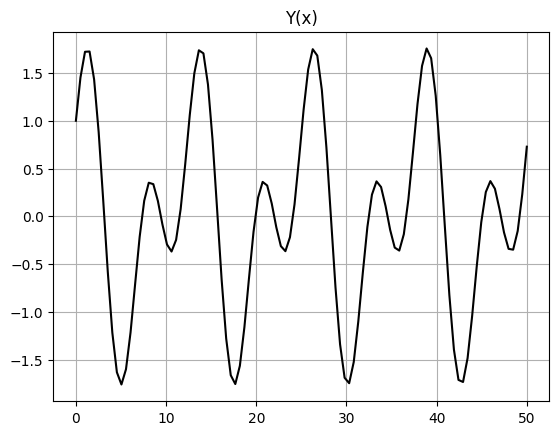

In [67]:
plot_arguments = { "x_values": x_values, 
                   "y_values": y_values }

build_plot(plot_arguments, title = "Y(x)")

##### Візуалізація значень Z-функції

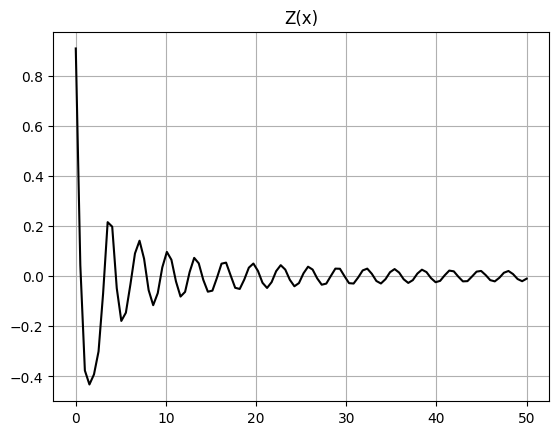

In [68]:
plot_arguments = { "x_values": x_values, 
                   "y_values": z_values }

build_plot(plot_arguments, title = "Z(x)")

#### Гаусівська функція приналежності

##### Розбиття даних на проміжки

In [112]:
IN_COUNT = 6
OUT_COUNT = 9

x_means = np.linspace(min(x_values), max(x_values), num = IN_COUNT)
y_means = np.linspace(min(y_values), max(y_values), num = IN_COUNT)
z_means = np.linspace(min(z_values), max(z_values), num = OUT_COUNT)

X_SIGMA = max(x_values) - min(x_values) / IN_COUNT / 2
Y_SIGMA = max(y_values) - min(y_values) / IN_COUNT / 2
Z_SIGMA = max(z_values) - min(z_values) / OUT_COUNT / 2

gaussian_x_values = [fuzz.gaussmf(x_values, mean, X_SIGMA) for mean in x_means]
gaussian_y_values = [fuzz.gaussmf(y_values, mean, Y_SIGMA) for mean in y_means]
gaussian_z_values = [fuzz.gaussmf(z_values, mean, Z_SIGMA) for mean in z_means]

##### Візуалізація функцій приналежності Гаусса

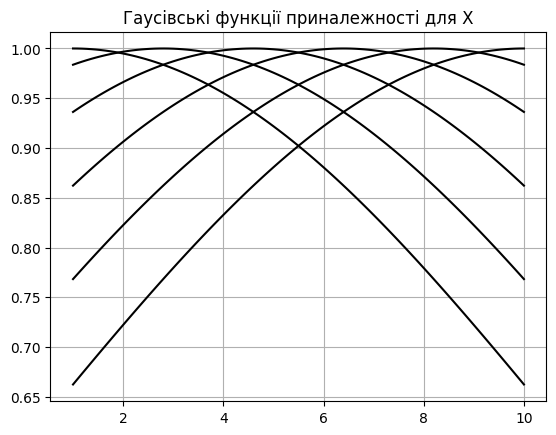

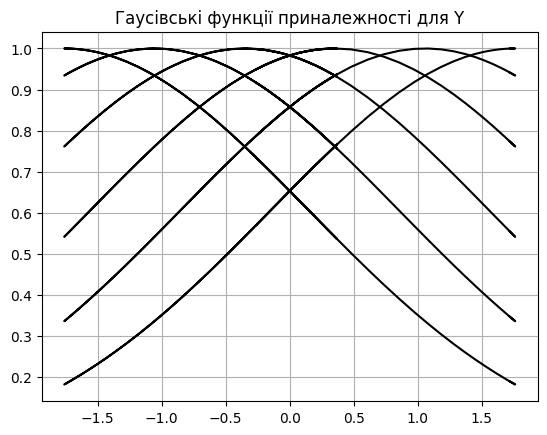

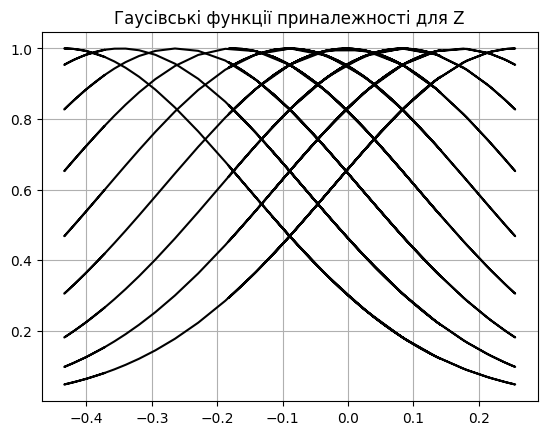

In [113]:
plot_arguments_x = {
    "x_values": x_values,
    "y_values": gaussian_x_values
}

plot_arguments_y = {
    "x_values": y_values,
    "y_values": gaussian_y_values
}

plot_arguments_z = {
    "x_values": z_values,
    "y_values": gaussian_z_values
}

build_plot(plot_arguments_x, title = "Гаусівські функції приналежності для X")
build_plot(plot_arguments_y, title = "Гаусівські функції приналежності для Y")
build_plot(plot_arguments_z, title = "Гаусівські функції приналежності для Z")

##### Побудова таблиці значень 

##### Складання правил

##### Оцінка похибки моделювання

#### Трикутна функція приналежності

##### Розбиття даних на проміжки

In [ ]:
IN_COUNT = 6
OUT_COUNT = 9

x_means = np.linspace(min(x_values), max(x_values), num = IN_COUNT)
y_means = np.linspace(min(y_values), max(y_values), num = IN_COUNT)
z_means = np.linspace(min(z_values), max(z_values), num = OUT_COUNT)

X_SIGMA = 0.1
Y_SIGMA = 0.3
Z_SIGMA = 0.1

gaussian_x_mf = [fuzz.gaussmf(x_values, mean, X_SIGMA) for mean in x_means]
gaussian_y_mf = [fuzz.gaussmf(y_values, mean, Y_SIGMA) for mean in y_means]
gaussian_z_mf = [fuzz.gaussmf(z_values, mean, Z_SIGMA) for mean in z_means]

##### Візуалізація трикутної функції приналежності

In [ ]:
plot_arguments_x = {
    "x_values": x_values,
    "y_values": gaussian_x_mf
}

plot_arguments_y = {
    "x_values": y_values,
    "y_values": gaussian_y_mf
}

plot_arguments_z = {
    "x_values": z_values,
    "y_values": gaussian_z_mf
}

build_plot(plot_arguments_x, title = "Гаусівські функції приналежності для X")
build_plot(plot_arguments_y, title = "Гаусівські функції приналежності для Y")
build_plot(plot_arguments_z, title = "Гаусівські функції приналежності для Z")